<a href="https://datamics.com/de/courses/"><img src=../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# Finanzdaten Projekt

In diesem Datenprojekt werden wir uns auf die Analyse von Aktienpreise konzentrieren. Denkt dabei daran, dass es hier primär um die Visualisierungs- und Analysefähigkeiten geht, nicht daraum verlässliche Finanzanalysen durchzuführen.

**Achtung**: Dieses Projekt wird eine große Herausforderung weil es eine Menge neuer Konzepte einführt, die ihr selbst recherchieren müsst. Nichtsdestotrotz werden wir die notwendigen Hinweise geben. Dabei sei es jedem freigestellt parallel ins Lösungsnotebook oder das Video-Material zu schauen und dieses Projekt als "Walkthrough" zu lösen.

Wir werden uns nun also Bankaktien anschauen und wie sie sich seit der Finanzkrise bis Anfang 2016 entwickelt haben.

## Die Daten

In dieser Sektion werden wir lernen, wie wir mit Pandas direkt Daten aus Google Fiance lesen können.

Zuerst müssen wir demnach einige Imports machen, welche im Rahmen dieses Projektes gegeben sind.

*Hinweis: Zum korrekten Auslesen der Finanzdaten müssen wir noch den [pandas-datareader](https://github.com/pydata/pandas-datareader) installieren:*

    conda install pandas-datareader

### Die Importe

*Bereits ausgefüllt:*

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
%matplotlib inline

### Daten

Wir können die Daten durch verwendung des *Pandas Datareader* erhalten. Dieser liefert uns Aktieninformationen zu den folgenden Banken:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Finde nun heraus, wie du die Aktiendaten vom 5 Jahren zurück bis heute für jede dieser Banken erhälst. Erstelle dazu für jede Bank einen eigenen DataFrame. Die Namen dieser DataFrames sollen dem Ticker Symbol (z.B.: BAC für Bank of America) entsprechen. Das alles benötigt einige Schritte:**

1. Nutze `datetime`, um Start und Ende Objekte zu erstellen. 
 **Achtung die Parameter für start und end haben leider in der   aktuellen pandas-datareader Version einen Bug**
2. Finde das Ticker Symbol für jede Bank heraus.
3. Finde heraus, wie du den datareader nutzen kannst, um die Informationen zu erhalten.

**Nutze diese [Dokumentationsseite](http://pandas.pydata.org/pandas-docs/stable/ecosystem.html) für Hinweise und Tipps. Es sollte dabei nur um das richtige Ersetzen bestimmter Daten gehen. Nutze "Stooq.com" als Quelle. Zum Beispiel:**

    # Bank of America
    # Achtung die Parameter für start und end haben leider in der aktuellen pandas-datareader Version einen Bug. 
    # und werden nicht angewendet
    BAC = data.DataReader("BAC","stooq",start,end)

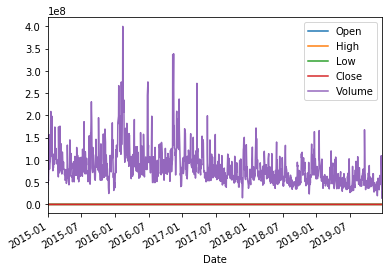

In [2]:
BAC = data.DataReader("BAC","stooq")
BAC.plot()

In [3]:
start = datetime.today() - relativedelta(years=5)
end = datetime.today()
print(f'Start date: {start}, end date {end}')

Start date: 2014-12-28 23:56:17.723334, end date 2019-12-28 23:56:17.723334


In [5]:
# Bank of America - BAC
BAC = data.DataReader('BAC', start=start, end=end, data_source='yahoo')
# CitiGroup
C     = data.DataReader('C', start=start, end=end, data_source='yahoo')
# Goldman Sachs 
GS = data.DataReader('GS', start=start, end=end, data_source='yahoo')
# JPMorgan Chase 
JPM = data.DataReader('JPM', start=start, end=end, data_source='yahoo')
# Morgan Stanley 
MS = data.DataReader('MS', start=start, end=end, data_source='yahoo')
# Wells Fargo
WFC = data.DataReader('WFC', start=start, end=end, data_source='yahoo')

**Erstelle eine Liste der Ticker Symbole (als String) in alphabetischer Reihenfolge. Nenne diese Liste "tickers".**

In [6]:
tickers = ['BAC', 'C', 'GS','JPM','MS','WFC']

In [7]:
BAC.shape

(1259, 6)

In [8]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-29,18.190001,17.910000,17.969999,18.110001,58370900.0,16.649832
2014-12-30,18.180000,18.010000,18.040001,18.129999,41433500.0,16.668221
2014-12-31,18.209999,17.889999,18.190001,17.889999,57819600.0,16.447567
2015-01-02,18.030001,17.680000,17.990000,17.900000,48951100.0,16.456766
2015-01-05,17.809999,17.290001,17.790001,17.379999,105605500.0,15.978690


**Nutze `pd.concat`, um die einzelnen DataFrames zu einem Banken-DataFrame namens "bank_stocks" zusammenzufassen. Setze dabei das Keys (dt. Schlüssel) Argument gleich der tickers-Liste.**

*Hinweis: Achte auf die Achse auf die du `concat` anwendest.*

In [13]:
bank_stocks = pd.concat([BAC, C, GS, MS, WFC],axis=1,  keys=tickers)

In [14]:
bank_stocks.shape

(1259, 30)

**Definiere die Spalten namen (bereits vorausgefüllt).**

In [16]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Schaue dir den head des bank_stocks DataFrame an.**

In [17]:
bank_stocks.head()

Bank Ticker        BAC                                                \
Stock Info        High        Low       Open      Close       Volume   
Date                                                                   
2014-12-29   18.190001  17.910000  17.969999  18.110001   58370900.0   
2014-12-30   18.180000  18.010000  18.040001  18.129999   41433500.0   
2014-12-31   18.209999  17.889999  18.190001  17.889999   57819600.0   
2015-01-02   18.030001  17.680000  17.990000  17.900000   48951100.0   
2015-01-05   17.809999  17.290001  17.790001  17.379999  105605500.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2014-12-29   16.649832  55.080002  54.029999  54.139999  54.730000  ...   
2014-12-30   16.668221  54.950001  54.250000  54.509998  54.840000  ...   
2014-12-31   16.447567  55.070000  54.099998  54.950001  54.110001  ...   
2015-01-02   16.456766  54.689999  53.790001  54.360001  54.259998  ...   
2015-01-05   15.978690  53.959999  52.330002  53.910000  52.549999  ...   

Bank Ticker        JPM                                           MS  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2014-12-29   38.669998  38.959999   3466900.0  34.920406  55.950001   
2014-12-30   38.669998  39.000000   4010600.0  34.956264  55.750000   
2014-12-31   39.119999  38.799999   6492900.0  34.777004  55.669998   
2015-01-02   39.049999  38.709999   7333800.0  34.696335  55.189999   
2015-01-05   38.459999  37.500000  12507900.0  33.611782  54.360001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2014-12-29   55.080002  55.080002  55.709999  11385600.0  47.737831  
2014-12-30   55.400002  55.520000  55.419998   8749400.0  47.489330  
2014-12-31   54.820000  55.500000  54.820000  10090800.0  46.975193  
2015-01-02   54.189999  55.110001  54.700001  11700900.0  46.872356  
2015-01-05   53.099998  54.139999  53.200001  15000500.0  45.587009  

[5 rows x 30 columns]

## Explorative Datenanalyse

Lasst uns die Daten etwas untersuchen! Doch bevor wir damit loslegen ermutige ich euch, das [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) und die [Nutzung von .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) genauer anzuschauen.

**Was ist der maximale Kurs zum Handelsschluss (en. close price) für jede der Banken in unserer gesamten Zeitperiode?**

**Erstelle einen neuen leeren DataFrame namens "returns" (dt. Rendite). Dieser DataFrame wird die Renditen für die Aktien der Banken beinhalten. Renditen sind typischerweise wie folgt definiert:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

**Wir können nun Pandas `pct_change()` Methode auf den Schlusskurs anwenden, um eine Spalte zu erzeugen, die die Renditen beinhaltet. Erstelle dazu eine `for` Schleife, die für jeden Bank Aktienticker diese Renditenspalte erzeugt und sie in unseren returns DataFrame schreibt.**

**Erstelle jetzt ein `pairplot` mit Seaborn vom returns DataFrame. Welche Aktien stechen heraus? Woran könnte das liegen?**

In [ ]:
#returns[1:]


Hintergrundinformationen zum Crash der Citigroup Aktie gibts [hier](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29).

Man sieht außerdem einen enormen Crash im Wert der Aktien (was wir bei den Visualisierungen später noch tun werden).

**Unter Verwendung des return DataFrame: finde heraus an welchem Tag die jeweiligen Banken die besten und schlechtesten Eintagesrenditen hatten. Dabei sollte dir auffallen, dass 4 der Banken ihren schlechtesten am selben Tag hatte. Was passierte an diesem Tag?**

**Dabei sollte aufgefallen sein, dass der größte Einbruch und Gewinn der Citigroup nahe zusammen liegen. Ist etwas signifikantes passiert?**

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

**Betrachte jetzt die Standardabweichung der Renditen. Welche Aktie würdest du demnach als die riskanteste über den gesamten Zeitraum hinweg bezeichnen? Welche würdest du als riskanteste im Jahr 2016 bezeichnen?**

**Erstelle ein `distplot` mit Seaborn für die Renditen von Morgan Stranley in 2016.**

**Erstelle ein `distplot` mit Seaborn für die Renditen der CitiGroup in 2015.**

## Mehr Visualisierungen

Der folgende Teil dieses Projekts dreht sich komplett um Visualisierungen.  Nutze dabei eine Library deiner Wahl, oder mehrere. Ziel ist es, die abgebildeten Visualisierungen nachzustellen. Wähle zwischen Seaborn, Matplotlib, Plotly, Cufflinks oder einfach Pandas.

### Importe

In [ ]:
# Installieren die neuste cufflinks Version, weil wir plot
%pip install cufflinks==0.17.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import chart_studio.plotly as py
from chart_studio.plotly import plot
import cufflinks as cf
cf.go_offline()

**Erstelle ein Liniendiagramm, das die Tagesschlusspreise für jede Bank für die gesamte Zeitperiode zeigt.**

*Hinweis: Eine `for` Schleife oder .xs können funktionieren.*

In [ ]:
# Plotly

### Laufender Durchschnitt

Lasst uns den laufenden Durchschnitt für diese Aktien im Jahr 2008 berechnen.

**Zeichne den laufenden 30-Tages-Durchschnitt gegen den Tagesschlusspreis für die Bank of America im Jahr 2008.**

**Erstelle eine `heatmap` der Korrelation zwischen den Schlusspreisen der Banken.**

**Optional: Nutze die `clustermap` aus Seaborn, um die Korrelationen zu clustern.**

# Gut gemacht!